In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
pd.set_option('max_columns', 200)
plt.style.use('ggplot')

# Import and read the healthcare-dataset-stroke-data.csv.
import pandas as pd 
medicare_df = pd.read_csv("current_clean.csv")
medicare_df.head()

,YEAR,State,Age_level,Beneficiaries_with_A_and_B,Fee_for_service_beneficiaries,Med_Advantage_Count,Med_Advantage_Rate,Average_Age,%Female,%Male,%White,%Black,%Hispanic,%OtherRace,%Dual_Eligible,Avg_Risk_Score,Total_Standardized_Costs,Total_Std_Risk_Adjusted_Costs,Standardized_Per_Capita_Costs,Standardized_Risk_Adjusted_Per_Capita_Costs,IP_Standardized_Costs,IP_Std_%Total,IP_Std_Per_Capita,IP_Std_Per_User,IP_Users,%Beneficiaries_Using_IP,IP_Covered_Stays_Per_1000,IP_Covered_Days_Per_1000,Hospital_Readmit_Count,Hospital_Readmit_Rate%,ER_Visits_Count,ER_Visits_Per_1000,%ER_Visits,OP_Std_Costs,OP_Std_%Total,OP_Std_Per_Capita_Costs,OP_Std_Per_User_Costs,OP_Users_Count,%_Using_OP,OP_Visits_Per_1000,SNF_Std_Costs,SNF_Std_As_%Total,SNF_Std_Per_Capita,SNF_Std_Per_User,SNF_Users_Count,SNF_Users_%Beneficiaries,SNF_Per_1000_Users,SNF_Days_Per_1000_Users,HH_Std_Costs,HH_Std_As_%Total,HH_Std_Per_Capita,HH_Std_Per_User,HH_User_Count,HH_User_Percent,HH_Per_1000_Users,HH_Visits_Per_1000_Users,Hospice_Std_Costs,Hospice_Std_As_%Total,Hospice_Std_Per_Capita,Hospice_Std_Per_User,Hospice_Count,Hospice_%,Hospice_Per_1000_Users,Hospice_Days_Per_1000_Users,EM_Std_Costs,EM_Std_As_%Total,EM_Std_Per_Capita,EM_Std_Per_User,EM_User_Count,EM_User_%,EM_Events_Per_1000_Users,Dialysis_Std_Costs,Dialysis_Std_As_%Total,Dialysis_Std_Per_Capita,Dialysis_Std_Per_User,Dialysis_User_Count,Dialysis_User_%,Dialysis_Visits_Per_1000_Users,FQHC_Std_Costs,FQHC_Std_As_%Total,FQHC_Std_Per_Capita,FQHC_Std_Per_User,FQHC_User_Count,FQHC_User_%,FQHC_Visits_Per_1000_Users
0,1/1/2021,WY,All,3573,2971,602,0.1685,70,0.4968,0.5032,NaN,NaN,NaN,NaN,0.1279,0.82,2.734664e+07,3.568681e+07,9204.52,12011.72,7255942.54,0.2653,2442.26,20970.93,346,0.1165,173,849,71,0.1504,1544,520,0.2612,6998713.36,0.2559,2355.68,3174.02,2205,0.7422,5253,1623732.63,0.0594,546.53,19330.15,84,0.0283,36,1040,1309179.11,0.0479,440.65,5643.01,232,0.0781,267,2484,744892.20,0.0272,250.72,14324.85,52,0.0175,18,1465,1981642.00,0.0725,666.99,786.68,2519,0.8479,8297,149611.09,0.0055,50.36,10686.51,14,0.0047,222,644752.76,0.0236,217.02,670.92,961,0.3235,1174
1,1/1/2021,WY,All,6444,6186,258,0.0400,71,0.5144,0.4856,0.8810,0.0063,0.0833,0.0294,0.1135,0.82,4.888226e+07,6.453098e+07,7902.08,10431.78,12069230.10,0.2469,1951.06,18596.66,649,0.1049,145,770,97,0.1177,3165,512,0.2614,10863909.57,0.2222,1756.21,3096.01,3509,0.5672,2803,4271972.74,0.0874,690.59,20637.55,207,0.0335,44,1358,2848734.67,0.0583,460.51,6288.60,453,0.0732,277,2683,1181927.45,0.0242,191.06,9531.67,124,0.0200,20,1080,4221378.92,0.0864,682.41,790.22,5342,0.8636,8832,927246.42,0.0190,149.89,23181.16,40,0.0065,741,330449.22,0.0068,53.42,306.26,1079,0.1744,553
2,1/1/2021,WY,All,7463,6861,602,0.0807,73,0.5270,0.4730,0.9469,0.0020,0.0144,0.0366,0.0931,0.76,5.079350e+07,6.815235e+07,7403.22,9933.30,13634283.73,0.2684,1987.22,16250.64,839,0.1223,170,762,164,0.1528,3383,493,0.2583,14980099.34,0.2949,2183.37,2902.00,5162,0.7524,4966,4477091.30,0.0881,652.54,16280.33,275,0.0401,48,1236,715178.94,0.0141,104.24,3764.10,190,0.0277,51,526,646188.89,0.0127,94.18,8974.85,72,0.0105,11,503,4269252.56,0.0841,622.25,706.83,6040,0.8803,8501,518888.03,0.0102,75.63,27309.90,19,0.0028,437,37418.97,0.0007,5.45,558.49,67,0.0098,39
3,1/1/2021,WY,All,7934,7525,409,0.0516,73,0.5171,0.4829,NaN,NaN,NaN,NaN,0.0888,0.79,6.632709e+07,9.096099e+07,8814.23,12087.84,15756765.38,0.2376,2093.92,17015.95,926,0.1231,166,849,141,0.1248,4057,539,0.2829,23978954.78,0.3615,3186.57,4091.97,5860,0.7787,6882,4854113.82,0.0732,645.06,32577.95,149,0.0198,24,480,797306.31,0.0120,105.95,3966.70,201,0.0267,59,394,889340.73,0.0134,118.18,6133.38,145,0.0193,20,628,4224373.59,0.0637,561.38,665.88,6344,0.8431,7500,335858.95,0.0051,44.63,25835.30,13,0.0017,253,952410.06,0.0144,126.57,471.26,2021,0.2686,818
4,1/1/2021,WY,All,14583,13311,1272,0.0872,71,0.5330,0.4670,0.9246,0.0072,0.0336,0.0346,0.1456,0.87,1.259380e+08,1.570273e+08,9461.20,11796.80,31760150.53,0.2522,2386.01,17317.42,1834,0.1378,198,1076,346,0.1419,687

In [2]:
medicare_df['YEAR'] = pd.to_datetime(medicare_df['YEAR'])
medicare_df.dtypes

YEAR                             datetime64[ns]
State                                    object
Age_level                                object
Beneficiaries_with_A_and_B                int64
Fee_for_service_beneficiaries             int64
                                      ...      
FQHC_Std_Per_Capita                     float64
FQHC_Std_Per_User                       float64
FQHC_User_Count                           int64
FQHC_User_%                             float64
FQHC_Visits_Per_1000_Users                int64
Length: 85, dtype: object

In [64]:
df = medicare_df[['YEAR', 'State', 
                  #'Age_level', 
       #'Beneficiaries_with_A_and_B',
       #'Fee_for_service_beneficiaries', 'Med_Advantage_Count',
       #'Med_Advantage_Rate', 
        'Average_Age', 
        #          '%Female', '%Male', '%White',
       #'%Black', '%Hispanic', '%OtherRace', 
        #'%Dual_Eligible', 
        'Avg_Risk_Score',
       'Total_Standardized_Costs', 
        #'Total_Std_Risk_Adjusted_Costs',
       'Standardized_Per_Capita_Costs',
       #'Standardized_Risk_Adjusted_Per_Capita_Costs', 'IP_Standardized_Costs',
       #'IP_Std_%Total', 'IP_Std_Per_Capita', 'IP_Std_Per_User', 
                  'IP_Users',
       #'%Beneficiaries_Using_IP', 'IP_Covered_Stays_Per_1000',
       #'IP_Covered_Days_Per_1000', 
                  'Hospital_Readmit_Count',
       'Hospital_Readmit_Rate%', 
        #'ER_Visits_Count', 'ER_Visits_Per_1000',
       #'%ER_Visits', 'OP_Std_Costs', 'OP_Std_%Total',
       #'#OP_Std_Per_Capita_Costs', 'OP_Std_Per_User_Costs', 'OP_Users_Count',
       #'%_Using_OP', 'OP_Visits_Per_1000', 'SNF_Std_Costs',
       #'SNF_Std_As_%Total', 'SNF_Std_Per_Capita', 'SNF_Std_Per_User',
       'SNF_Users_Count', 
#                   'SNF_Users_%Beneficiaries', 'SNF_Per_1000_Users',
       #'SNF_Days_Per_1000_Users', 'HH_Std_Costs', 'HH_Std_As_%Total',
       #'HH_Std_Per_Capita', 'HH_Std_Per_User', 
                  'HH_User_Count',
       'HH_User_Percent', 
#                   'HH_Per_1000_Users', 'HH_Visits_Per_1000_Users',
       #'Hospice_Std_Costs', 'Hospice_Std_As_%Total', 'Hospice_Std_Per_Capita',
       #'Hospice_Std_Per_User', 
                  'Hospice_Count', 'Hospice_%',
       #'Hospice_Per_1000_Users', 'Hospice_Days_Per_1000_Users', 'EM_Std_Costs',
       #'EM_Std_As_%Total', 'EM_Std_Per_Capita', 'EM_Std_Per_User',
       #'EM_User_Count', 'EM_User_%', 'EM_Events_Per_1000_Users',
       #'Dialysis_Std_Costs', 'Dialysis_Std_As_%Total',
       #'Dialysis_Std_Per_Capita', 'Dialysis_Std_Per_User',
       'Dialysis_User_Count', 'Dialysis_User_%',
       #'Dialysis_Visits_Per_1000_Users', 'FQHC_Std_Costs',
       #'FQHC_Std_As_%Total', 'FQHC_Std_Per_Capita', 'FQHC_Std_Per_User',
      # 'FQHC_User_Count', 'FQHC_User_%', 'FQHC_Visits_Per_1000_Users'
                 ]].copy()

In [65]:
#Removing % from column name
df.columns = df.columns.str.replace('%', '')

In [66]:
df

,YEAR,State,Average_Age,Avg_Risk_Score,Total_Standardized_Costs,Standardized_Per_Capita_Costs,IP_Users,Hospital_Readmit_Count,Hospital_Readmit_Rate,SNF_Users_Count,HH_User_Count,HH_User_Percent,Hospice_Count,Hospice_,Dialysis_User_Count,Dialysis_User_
0,2021-01-01,WY,70,0.82,2.734664e+07,9204.52,346,71,0.1504,84,232,0.0781,52,0.0175,14,0.0047
1,2021-01-01,WY,71,0.82,4.888226e+07,7902.08,649,97,0.1177,207,453,0.0732,124,0.0200,40,0.0065
2,2021-01-01,WY,73,0.76,5.079350e+07,7403.22,839,164,0.1528,275,190,0.0277,72,0.0105,19,0.0028
3,2021-01-01,WY,73,0.79,6.632709e+07,8814.23,926,141,0.1248,149,201,0.0267,145,0.0193,13,0.0017
4,2021-01-01,WY,71,0.87,1.259380e+08,9461.20,1834,346,0.1419,354,622,0.0467,345,0.0259,74,0.0056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,2016-01-01,WI,71,0.92,5.821184e+07,8740.52,1111,202,0.1340,332,199,0.0299,156,0.0234,40,0.0060
23142,2016-01-01,WI,70,0.94,1.882174e+07,7720.16,417,83,0.1540,155,63,0.0258,49,0.0201,17,0.0070
23143,2016-01-01,WI,69,0.90,3.738159e+07,7835.17,740,175,0.1802,188,182,0.0381,109,0.0228,30,0.0063
23144,2016-01-01,WI,75,0.91,4.018967e+09,8055.64,79480,16652,0.1509,25619,29329,0.0588,17355,0.0348,2751,0.0055


In [42]:
# Dropping rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

YEAR                             0
State                            0
Average_Age                      0
Avg_Risk_Score                   0
Total_Standardized_Costs         0
Standardized_Per_Capita_Costs    0
IP_Users                         0
Hospital_Readmit_Count           0
Hospital_Readmit_Rate            0
Dialysis_User_Count              0
Dialysis_User_                   0
dtype: int64

In [43]:
df.columns

Index(['YEAR', 'State', 'Average_Age', 'Avg_Risk_Score',
       'Total_Standardized_Costs', 'Standardized_Per_Capita_Costs', 'IP_Users',
       'Hospital_Readmit_Count', 'Hospital_Readmit_Rate',
       'Dialysis_User_Count', 'Dialysis_User_'],
      dtype='object')

In [44]:
df['State'].value_counts()

TX    1704
GA    1360
VA    1100
KY     891
NC     872
IL     809
IN     803
OH     800
MO     789
TN     787
MS     756
MI     678
AL     630
IA     620
WI     617
AR     614
FL     606
PA     593
LA     592
OK     586
NY     572
MN     538
CA     505
SC     441
WV     424
KS     420
WA     328
OR     289
CO     274
MD     243
NE     239
ID     236
NM     235
NJ     216
SD     174
UT     167
ME     166
AZ     153
MA     139
ND     139
MT     137
VT     130
WY     119
NH     117
NV     109
CT      99
RI      72
AK      68
HI      59
DE      54
DC      36
PR      22
VI      19
Name: State, dtype: int64

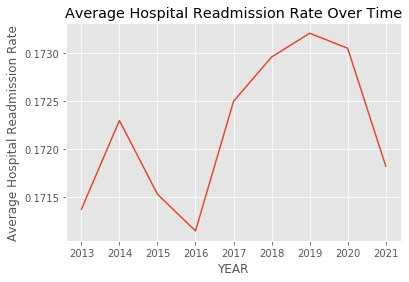

In [221]:


# Calculate the average of Hospital_Readmit_Rate
average_readmit_rate = df.groupby('YEAR')['Hospital_Readmit_Rate'].mean()

# Create a line graph
plt.plot(average_readmit_rate.index, average_readmit_rate.values)
plt.xlabel('YEAR')
plt.ylabel('Average Hospital Readmission Rate')
plt.title('Average Hospital Readmission Rate Over Time')
plt.show()




In [224]:
average_readmit_rate


YEAR
2013-01-01    0.171378
2014-01-01    0.172297
2015-01-01    0.171534
2016-01-01    0.171153
2017-01-01    0.172498
2018-01-01    0.172955
2019-01-01    0.173202
2020-01-01    0.173046
2021-01-01    0.171824
Name: Hospital_Readmit_Rate, dtype: float64

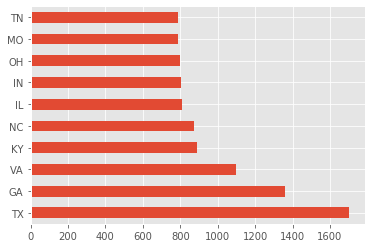

In [45]:
df['State'].value_counts() \
    .head(10) \
    .plot(kind='barh')

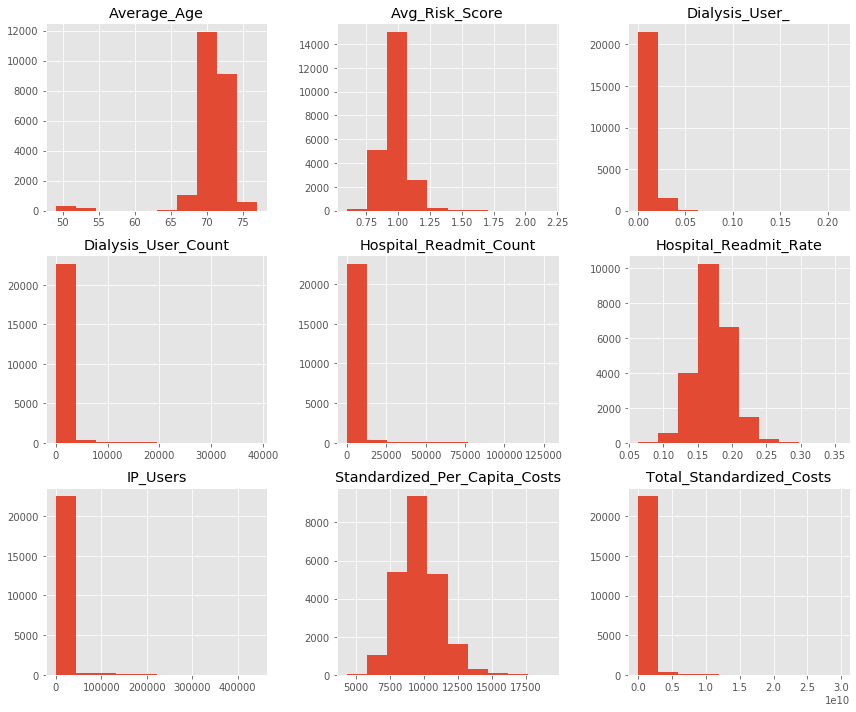

In [46]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

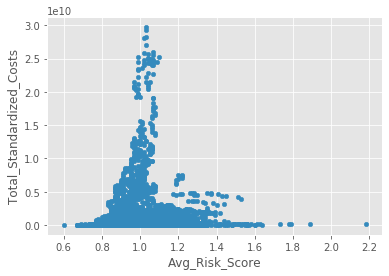

In [47]:
df.plot(kind='scatter',
       x='Avg_Risk_Score',
       y='Total_Standardized_Costs')

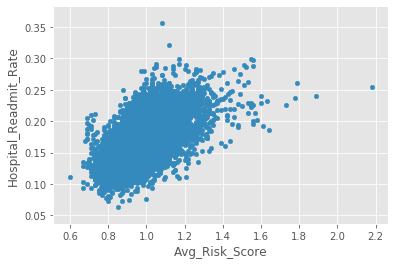

In [48]:
df.plot(kind='scatter',
       x='Avg_Risk_Score',
       y='Hospital_Readmit_Rate')

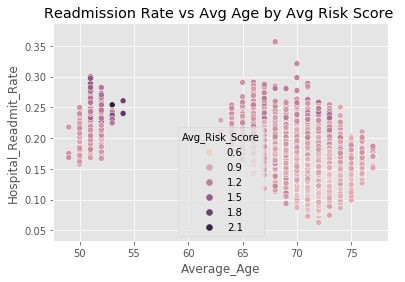

In [218]:
sns.scatterplot(x='Average_Age',
                y='Hospital_Readmit_Rate',
                hue = 'Avg_Risk_Score',
                data=df)
plt.title('Readmission Rate vs Avg Age by Avg Risk Score ')
plt.show()


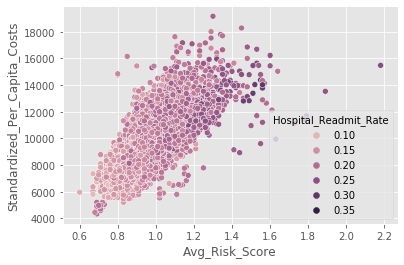

In [25]:
sns.scatterplot(x='Avg_Risk_Score',
                y='Standardized_Per_Capita_Costs',
                hue = 'Hospital_Readmit_Rate',
                data=df)

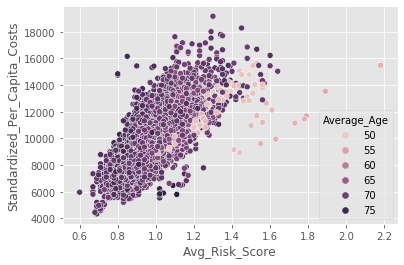

In [38]:
sns.scatterplot(x='Avg_Risk_Score',
                y='Standardized_Per_Capita_Costs',
                hue = 'Average_Age',
                data=df)

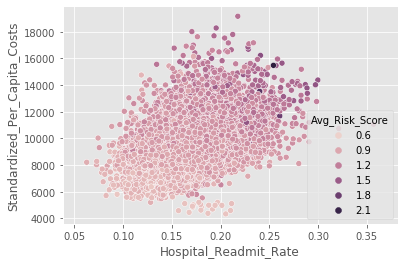

In [36]:
sns.scatterplot(x='Hospital_Readmit_Rate',
                y='Standardized_Per_Capita_Costs',
                hue = 'Avg_Risk_Score',
                data=df)

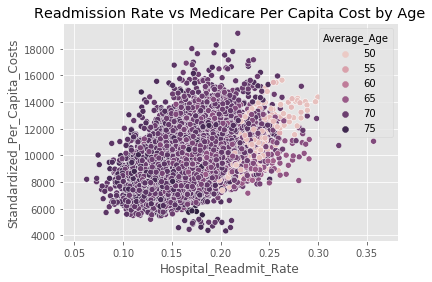

In [217]:
sns.scatterplot(x='Hospital_Readmit_Rate',
                y='Standardized_Per_Capita_Costs',
                hue = 'Average_Age',
                data=df)
plt.title('Readmission Rate vs Medicare Per Capita Cost by Age')
plt.show()


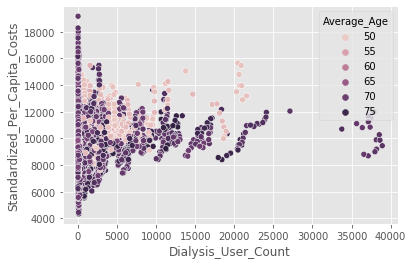

In [57]:
sns.scatterplot(x='Dialysis_User_Count',
                y='Standardized_Per_Capita_Costs',
                hue = 'Average_Age',
                data=df)

KeyboardInterrupt: 

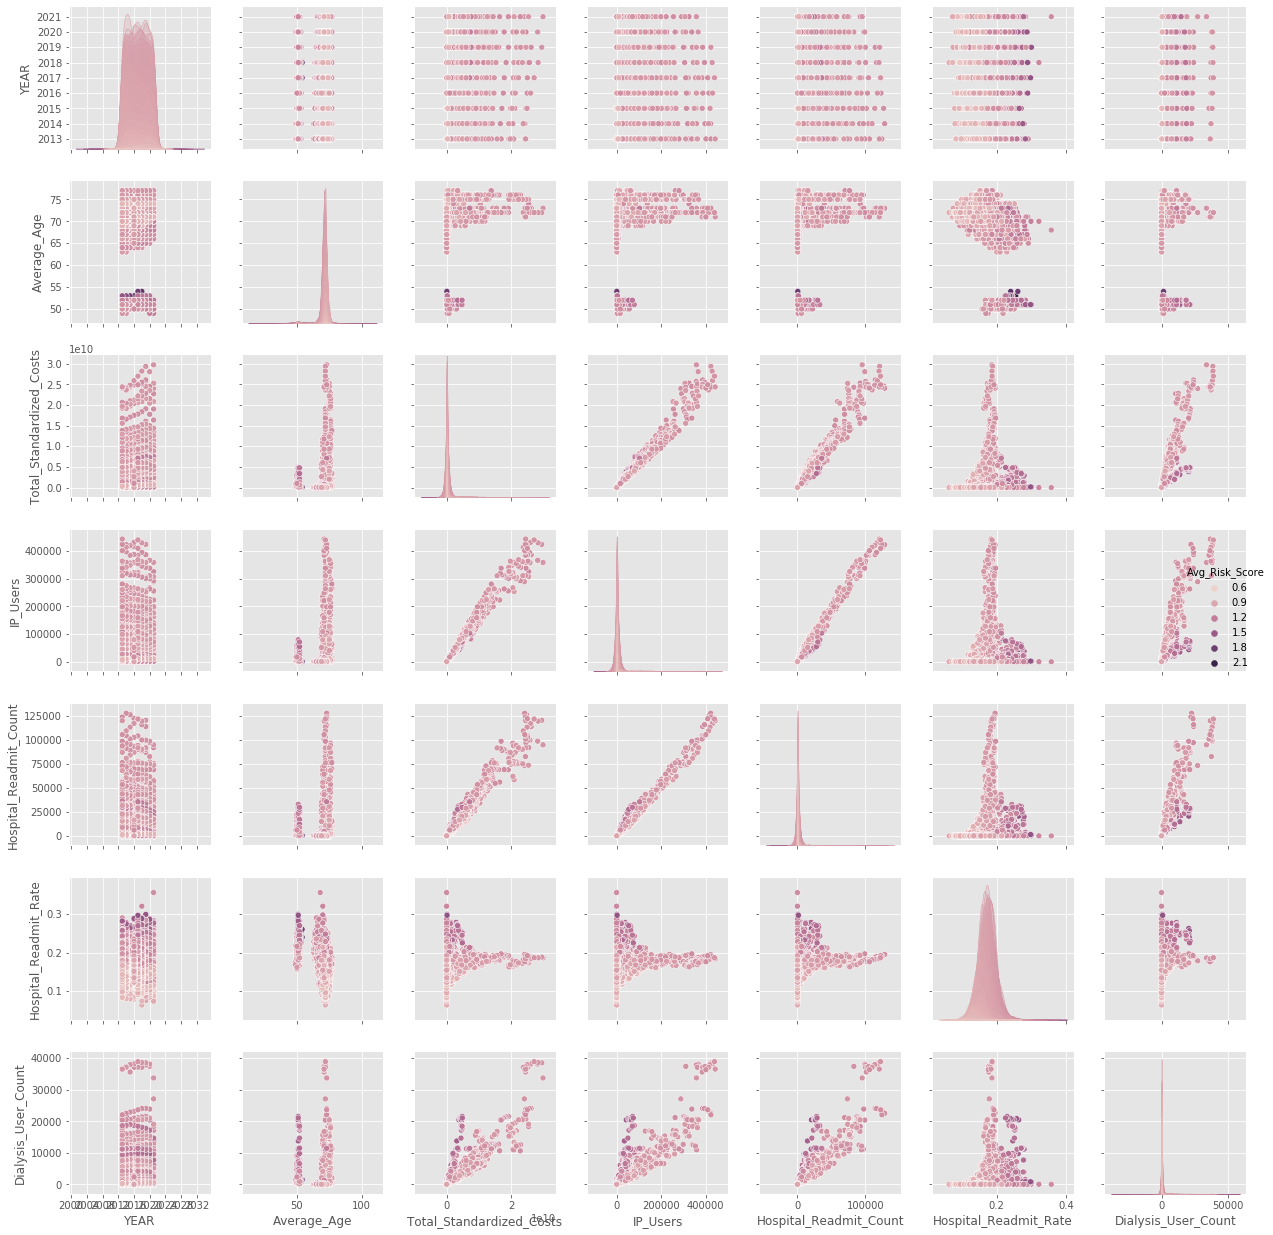

In [51]:
sns.pairplot(df, 
             vars=['YEAR', 'Average_Age',
                   'Total_Standardized_Costs', 'IP_Users', 'Hospital_Readmit_Count',
                   'Hospital_Readmit_Rate','Dialysis_User_Count'],
            hue = 'Avg_Risk_Score',
            )


In [52]:
df_corr = df[['YEAR', 'State', 'Average_Age', 'Avg_Risk_Score',
       'Total_Standardized_Costs', 'IP_Users', 'Hospital_Readmit_Count',
       'Hospital_Readmit_Rate', 'Standardized_Per_Capita_Costs', 'Dialysis_User_Count', 'Dialysis_User_']].corr()
df_corr


,Average_Age,Avg_Risk_Score,Total_Standardized_Costs,IP_Users,Hospital_Readmit_Count,Hospital_Readmit_Rate,Standardized_Per_Capita_Costs,Dialysis_User_Count,Dialysis_User_
Average_Age,1.000000,-0.372852,0.050108,0.053024,0.005853,-0.395465,-0.101607,-0.130870,-0.471412
Avg_Risk_Score,-0.372852,1.000000,0.072137,0.066385,0.099565,0.601768,0.707696,0.163168,0.718264
Total_Standardized_Costs,0.050108,0.072137,1.000000,0.990657,0.984135,0.068001,0.052773,0.911542,0.022696
IP_Users,0.053024,0.066385,0.990657,1.000000,0.993105,0.065824,0.037916,0.898246,0.014707
Hospital_Readmit_Count,0.005853,0.099565,0.984135,0.993105,1.000000,0.101142,0.058444,0.920803,0.047133
Hospital_Readmit_Rate,-0.395465,0.601768,0.068001,0.065824,0.101142,1.000000,0.453759,0.143175,0.415165
Standardized_Per_Capita_Costs,-0.101607,0.707696,0.052773,0.037916,0.058444,0.453759,1.000000,0.088743,0.450542
Dialysis_User_Count,-0.130870,0.163168,0.911542,0.898246,0.920803,0.143175,0.088743,1.000000,0.171398
Dialysis_User_,-0.471412,0.718264,0.022696,0.014707,0.047133,0.415165,0.450542,0.171398,1.000000


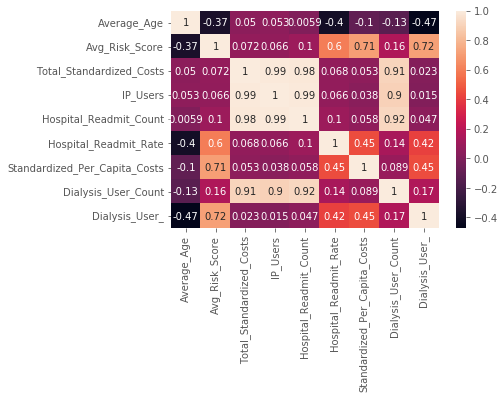

In [53]:
sns.heatmap(df_corr, annot=True)



In [157]:
#Make df's for ages
filtered_older_age_df = df[df['Average_Age'] >= 63]
filtered_younger_age_df = df[df['Average_Age'] <= 54]

# # Reset the index 
# filtered_older_age_df.reset_index(inplace=True)
# filtered_younger_age_df.reset_index(inplace=True)

filtered_older_age_df

,YEAR,State,Average_Age,Avg_Risk_Score,Total_Standardized_Costs,Standardized_Per_Capita_Costs,IP_Users,Hospital_Readmit_Count,Hospital_Readmit_Rate,SNF_Users_Count,HH_User_Count,HH_User_Percent,Hospice_Count,Hospice_,Dialysis_User_Count,Dialysis_User_
0,2021-01-01,WY,70,0.82,2.734664e+07,9204.52,346,71,0.1504,84,232,0.0781,52,0.0175,14,0.0047
1,2021-01-01,WY,71,0.82,4.888226e+07,7902.08,649,97,0.1177,207,453,0.0732,124,0.0200,40,0.0065
2,2021-01-01,WY,73,0.76,5.079350e+07,7403.22,839,164,0.1528,275,190,0.0277,72,0.0105,19,0.0028
3,2021-01-01,WY,73,0.79,6.632709e+07,8814.23,926,141,0.1248,149,201,0.0267,145,0.0193,13,0.0017
4,2021-01-01,WY,71,0.87,1.259380e+08,9461.20,1834,346,0.1419,354,622,0.0467,345,0.0259,74,0.0056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23140,2016-01-01,WI,71,0.82,1.975058e+07,7076.52,384,86,0.1660,122,66,0.0236,42,0.0150,12,0.0043
23141,2016-01-01,WI,71,0.92,5.821184e+07,8740.52,1111,202,0.1340,332,199,0.0299,156,0.0234,40,0.0060
23142,2016-01-01,WI,70,0.94,1.882174e+07,7720.16,417,83,0.1540,155,63,0.0258,49,0.0201,17,0.0070
23143,2016-01-01,WI,69,0.90,3.738159e+07,7835.17,740,175,0.1802,188,182,0.0381,109,0.0228,30,0.0063


# comparison - snf, hospice, hh

In [90]:
age_df = df.groupby('Average_Age').agg({
    'Avg_Risk_Score': 'mean',
    'Standardized_Per_Capita_Costs': 'mean',
    'Hospital_Readmit_Rate': 'mean',
    'Hospice_': 'mean',
    'Hospice_Count': 'sum',
    'HH_User_Percent': 'mean',
    'HH_User_Count': 'sum',
    'SNF_Users_Count': 'sum',
    'Dialysis_User_': 'sum',
    'IP_Users': 'sum',
    
})

age_df

filtered_age_df = age_df[age_df.index >= 63]

filtered_age_lower_df = age_df[age_df.index <= 54]



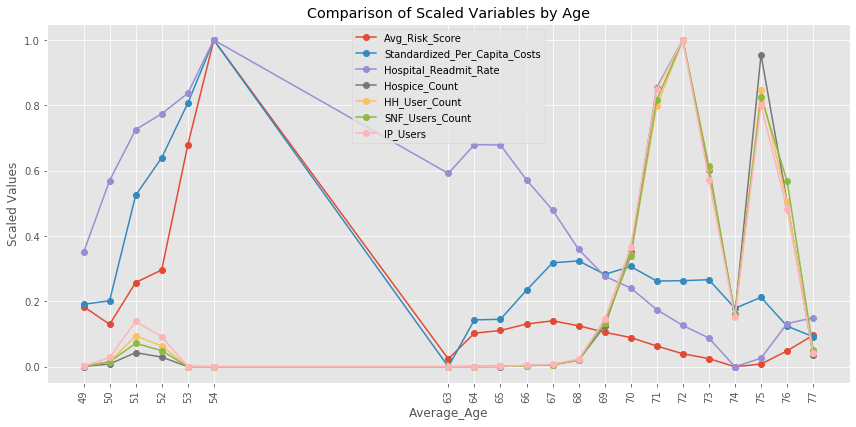

In [208]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'age_df' is the DataFrame containing the data

# Select the columns for scaling
columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
       'Hospital_Readmit_Rate', 
#                     'Hospice_', 
                    'Hospice_Count', 
#                     'HH_User_Percent',
       'HH_User_Count', 'SNF_Users_Count', 
#                     'Dialysis_User_', 
                    'IP_Users']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(age_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['Average_Age'] = age_df.index

# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))

# Iterate over the columns (excluding 'Average_Age') and plot each one
for column in scaled_df.columns[:-1]:
    plt.plot(scaled_df['Average_Age'], scaled_df[column], marker='o', label=column)

plt.xlabel('Average_Age')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Age')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual ages
plt.xticks(scaled_df['Average_Age'])

plt.show()





In [193]:
#calculate year for entire df
year_df = df.groupby('YEAR').agg({
    'Avg_Risk_Score': 'mean',
    'Standardized_Per_Capita_Costs': 'mean',
    'Hospital_Readmit_Rate': 'mean',
    'Hospice_': 'mean',
    'Hospice_Count': 'sum',
    'HH_User_Percent': 'mean',
    'HH_User_Count': 'sum',
    'SNF_Users_Count': 'sum',
    'Dialysis_User_': 'sum',
    'IP_Users': 'sum',
})

# # # Reset the index of year_older_df
year_df.reset_index(inplace=True)
year_df.columns
year_df

,YEAR,Avg_Risk_Score,Standardized_Per_Capita_Costs,Hospital_Readmit_Rate,Hospice_,Hospice_Count,HH_User_Percent,HH_User_Count,SNF_Users_Count,Dialysis_User_,IP_Users
0,2013-01-01,0.967958,8894.342525,0.171378,0.026857,2758329,0.087565,9689915,5170052,25.6002,17939282
1,2014-01-01,0.970000,8948.379781,0.172297,0.026526,2714443,0.086493,9502338,5090026,26.2497,17414428
2,2015-01-01,0.975284,9285.034173,0.171534,0.027047,2744587,0.087679,9563910,5084831,26.5346,17282084
3,2016-01-01,0.976232,9374.397448,0.171153,0.027287,2802042,0.086676,9605817,4971258,27.0413,17269432
4,2017-01-01,0.980215,9597.758394,0.172498,0.027876,2838163,0.085725,9424157,4844173,28.0209,17145922
5,2018-01-01,0.983907,9975.204284,0.172955,0.028352,2844556,0.085476,9275315,4640826,28.7685,16554515
6,2019-01-01,0.986815,10323.460877,0.173202,0.029057,2858136,0.084533,9091143,4441025,29.7824,16121700
7,2020-01-01,0.987895,9961.990334,0.173046,0.030577,2929675,0.082800,8465392,3988477,30.0459,13868064
8,2021-01-01,0.991157,10598.051482,0.171824,0.030788,2744626,0.084782,8225281,3712334,24.2558,13013552


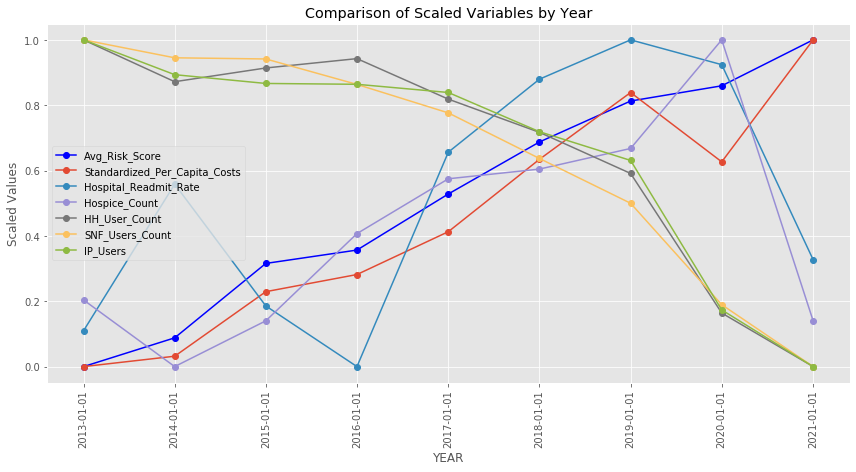

In [207]:
#By Year

columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
       'Hospital_Readmit_Rate', 
#                     'Hospice_', 
                    'Hospice_Count', 
#                     'HH_User_Percent',
       'HH_User_Count', 'SNF_Users_Count', 
#                     'Dialysis_User_', 
                    'IP_Users']
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(year_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['YEAR'] = year_df['YEAR']



# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))


# Iterate over the columns (excluding 'YEAR') and plot each one
for column in scaled_df.columns[:-1]:
    if column == 'Avg_Risk_Score':
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', color='blue')
    else:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column)

plt.xlabel('YEAR')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Year')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual years
plt.xticks(scaled_df['YEAR'])

plt.show()



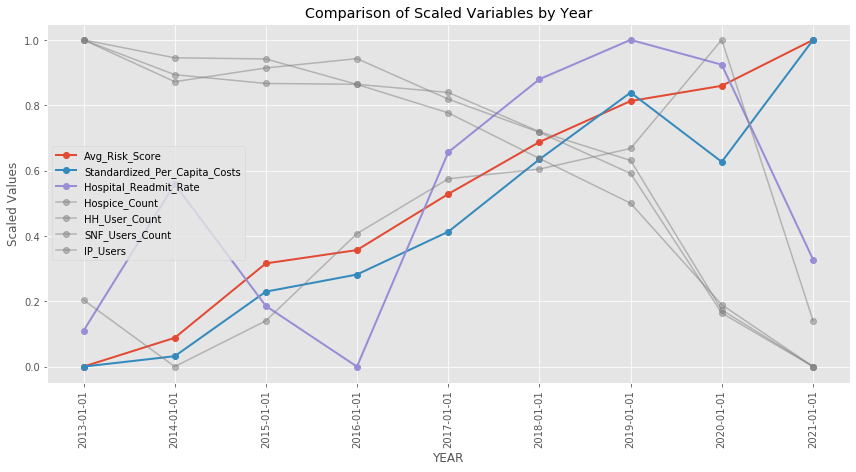

In [210]:
#only viewing 3 variables


# Define the columns to scale and plot
columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
                    'Hospital_Readmit_Rate', 'Hospice_Count', 'HH_User_Count',
                    'SNF_Users_Count', 'IP_Users']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(year_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['YEAR'] = year_df['YEAR']

# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))

# Iterate over the columns (excluding 'YEAR') and plot each one
for column in scaled_df.columns[:-1]:
    if column in ['Hospital_Readmit_Rate', 'Avg_Risk_Score', 'Standardized_Per_Capita_Costs']:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', linewidth=2)
    else:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', color='grey', alpha=0.5)

plt.xlabel('YEAR')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Year')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual years
plt.xticks(scaled_df['YEAR'])

plt.show()


# Average Age >= 63

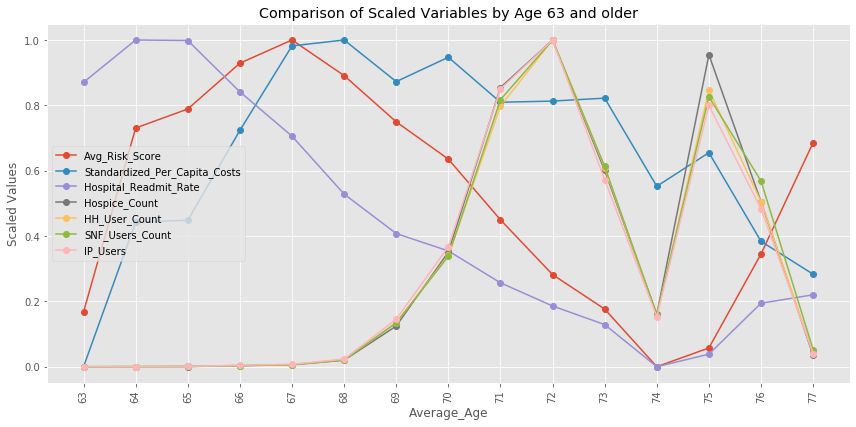

In [206]:
# Assuming 'age_df' is the DataFrame containing the data

# Select the columns for scaling
columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
       'Hospital_Readmit_Rate', 
#                     'Hospice_', 
                    'Hospice_Count', 
#                     'HH_User_Percent',
       'HH_User_Count', 'SNF_Users_Count', 
#                     'Dialysis_User_', 
                    'IP_Users']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(filtered_age_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['Average_Age'] = filtered_age_df.index

# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))

# Iterate over the columns (excluding 'Average_Age') and plot each one
for column in scaled_df.columns[:-1]:
    plt.plot(scaled_df['Average_Age'], scaled_df[column], marker='o', label=column)

plt.xlabel('Average_Age')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Age 63 and older')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual ages
plt.xticks(scaled_df['Average_Age'])

plt.show()


In [172]:
# Get the year variables
year_older_df = filtered_older_age_df.groupby('YEAR').agg({
    'Avg_Risk_Score': 'mean',
    'Standardized_Per_Capita_Costs': 'mean',
    'Hospital_Readmit_Rate': 'mean',
    'Hospice_': 'mean',
    'Hospice_Count': 'sum',
    'HH_User_Percent': 'mean',
    'HH_User_Count': 'sum',
    'SNF_Users_Count': 'sum',
    'Dialysis_User_': 'sum',
    'IP_Users': 'sum',
})


# # # Reset the index of year_older_df
year_older_df.reset_index(inplace=True)
year_older_df.columns
year_older_df

,YEAR,Avg_Risk_Score,Standardized_Per_Capita_Costs,Hospital_Readmit_Rate,Hospice_,Hospice_Count,HH_User_Percent,HH_User_Count,SNF_Users_Count,Dialysis_User_,IP_Users
0,2013-01-01,0.965234,8883.128690,0.170479,0.027223,2705107,0.088139,9273099,5014513,24.1091,16838118
1,2014-01-01,0.967090,8934.840499,0.171403,0.026897,2661764,0.087091,9097342,4934658,24.6743,16346257
2,2015-01-01,0.972333,9270.738509,0.170623,0.027406,2693618,0.088213,9171299,4932704,25.0364,16254727
3,2016-01-01,0.972851,9356.222669,0.170150,0.027670,2750758,0.087257,9220852,4819748,25.3680,16257128
4,2017-01-01,0.976260,9579.002223,0.171447,0.028262,2787781,0.086295,9063212,4699846,26.2720,16185447
5,2018-01-01,0.979816,9953.102713,0.171896,0.028741,2795373,0.086043,8936948,4504934,26.9204,15658667
6,2019-01-01,0.982367,10299.263430,0.172059,0.029452,2810846,0.085084,8780566,4316360,27.7991,15300579
7,2020-01-01,0.983817,9935.760721,0.171938,0.030987,2885055,0.083318,8189449,3873418,28.1634,13190127
8,2021-01-01,0.987475,10576.399898,0.170699,0.031210,2705384,0.085350,7988238,3616471,22.7429,12440525


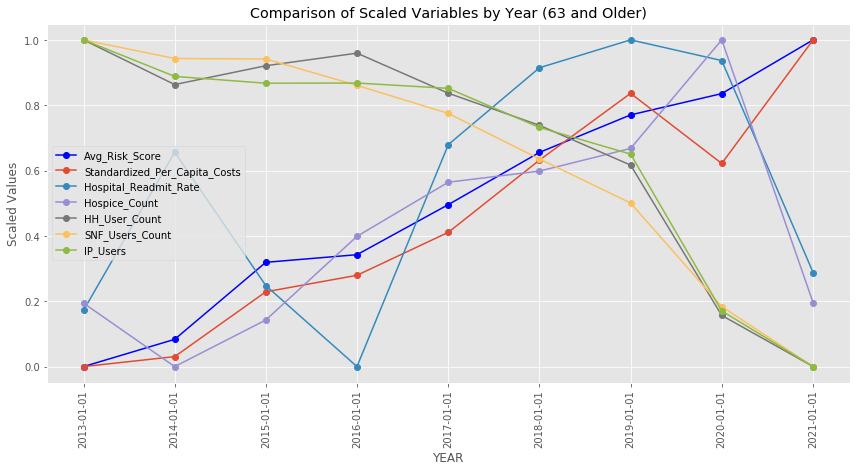

In [205]:
columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
       'Hospital_Readmit_Rate', 
#                     'Hospice_', 
                    'Hospice_Count', 
#                     'HH_User_Percent',
       'HH_User_Count', 'SNF_Users_Count', 
#                     'Dialysis_User_', 
                    'IP_Users']
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(year_older_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['YEAR'] = year_older_df['YEAR']



# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))


# Iterate over the columns (excluding 'YEAR') and plot each one
for column in scaled_df.columns[:-1]:
    if column == 'Avg_Risk_Score':
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', color='blue')
    else:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column)

plt.xlabel('YEAR')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Year (63 and Older)')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual years
plt.xticks(scaled_df['YEAR'])

plt.show()


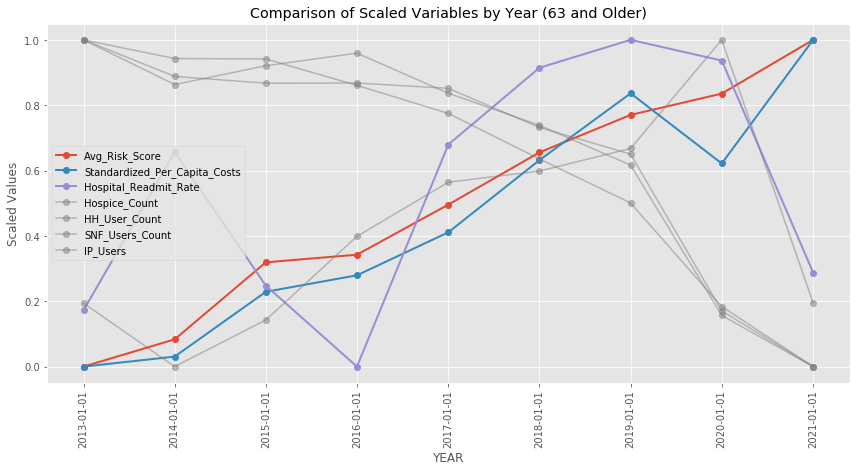

In [212]:
#only showing 3 variables

import matplotlib.pyplot as plt

# Define the columns to scale and plot
columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
                    'Hospital_Readmit_Rate', 'Hospice_Count', 'HH_User_Count',
                    'SNF_Users_Count', 'IP_Users']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(year_older_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['YEAR'] = year_older_df['YEAR']

# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))

# Iterate over the columns (excluding 'YEAR') and plot each one
for column in scaled_df.columns[:-1]:
    if column in ['Hospital_Readmit_Rate', 'Avg_Risk_Score', 'Standardized_Per_Capita_Costs']:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', linewidth=2)
    else:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', color='grey', alpha=0.5)

plt.xlabel('YEAR')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Year (63 and Older)')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual years
plt.xticks(scaled_df['YEAR'])

plt.show()



# Average Age <= 54

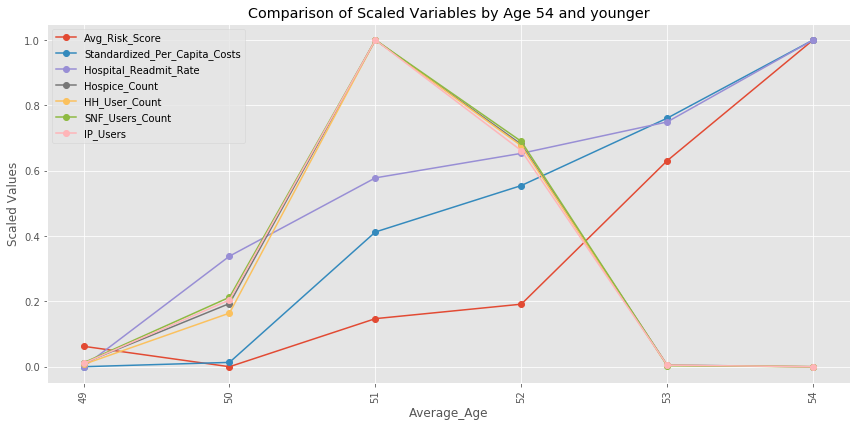

In [204]:
# Assuming 'age_df' is the DataFrame containing the data

# Select the columns for scaling
columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
       'Hospital_Readmit_Rate', 
#                     'Hospice_', 
                    'Hospice_Count', 
#                     'HH_User_Percent',
       'HH_User_Count', 'SNF_Users_Count', 
#                     'Dialysis_User_', 
                    'IP_Users']
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(filtered_age_lower_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['Average_Age'] = filtered_age_lower_df.index

# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))

# Iterate over the columns (excluding 'Average_Age') and plot each one
for column in scaled_df.columns[:-1]:
    plt.plot(scaled_df['Average_Age'], scaled_df[column], marker='o', label=column)

plt.xlabel('Average_Age')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Age 54 and younger')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual ages
plt.xticks(scaled_df['Average_Age'])

plt.show()

In [165]:


# Get the year variables
year_younger_df = filtered_younger_age_df.groupby('YEAR').agg({
    'Avg_Risk_Score': 'mean',
    'Standardized_Per_Capita_Costs': 'mean',
    'Hospital_Readmit_Rate': 'mean',
    'Hospice_': 'mean',
    'Hospice_Count': 'sum',
    'HH_User_Percent': 'mean',
    'HH_User_Count': 'sum',
    'SNF_Users_Count': 'sum',
    'Dialysis_User_': 'sum',
    'IP_Users': 'sum',
})


# # # Reset the index of year_older_df
year_younger_df.reset_index(inplace=True)
year_younger_df.columns
year_younger_df

,YEAR,Avg_Risk_Score,Standardized_Per_Capita_Costs,Hospital_Readmit_Rate,Hospice_,Hospice_Count,HH_User_Percent,HH_User_Count,SNF_Users_Count,Dialysis_User_,IP_Users
0,2013-01-01,1.104000,9454.361400,0.216302,0.008608,53222,0.058914,416816,155539,1.4911,1101164
1,2014-01-01,1.110192,9600.608654,0.215387,0.008612,52679,0.057683,404996,155368,1.5754,1068171
2,2015-01-01,1.126327,10016.738776,0.218133,0.008678,50969,0.060327,392611,152127,1.4982,1027357
3,2016-01-01,1.140192,10255.874231,0.219821,0.008725,51284,0.058525,384965,151510,1.6733,1012304
4,2017-01-01,1.174231,10517.892885,0.224054,0.008950,50382,0.057760,360945,144327,1.7489,960475
5,2018-01-01,1.184615,11059.456346,0.224938,0.009240,49183,0.057650,338367,135892,1.8481,895848
6,2019-01-01,1.205769,11514.719808,0.229481,0.009629,47290,0.057381,310577,124665,1.9833,821121
7,2020-01-01,1.191961,11274.499608,0.228516,0.010051,44620,0.056861,275943,115059,1.8825,677937
8,2021-01-01,1.170800,11654.648800,0.226700,0.010210,39242,0.057040,237043,95863,1.5129,573027


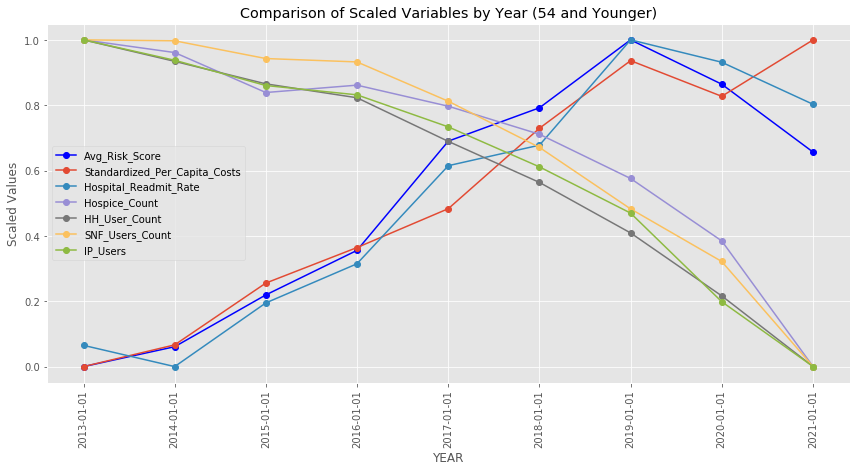

In [181]:
columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
       'Hospital_Readmit_Rate', 
#                     'Hospice_', 
                    'Hospice_Count', 
#                     'HH_User_Percent',
       'HH_User_Count', 'SNF_Users_Count', 
#                     'Dialysis_User_', 
                    'IP_Users']


# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(year_younger_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['YEAR'] = year_younger_df['YEAR']

# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))

# Iterate over the columns (excluding 'YEAR') and plot each one
for column in scaled_df.columns[:-1]:
    if column == 'Avg_Risk_Score':
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', color='blue')
    else:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column)

plt.xlabel('YEAR')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Year (54 and Younger)')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual years
plt.xticks(scaled_df['YEAR'])

plt.show()

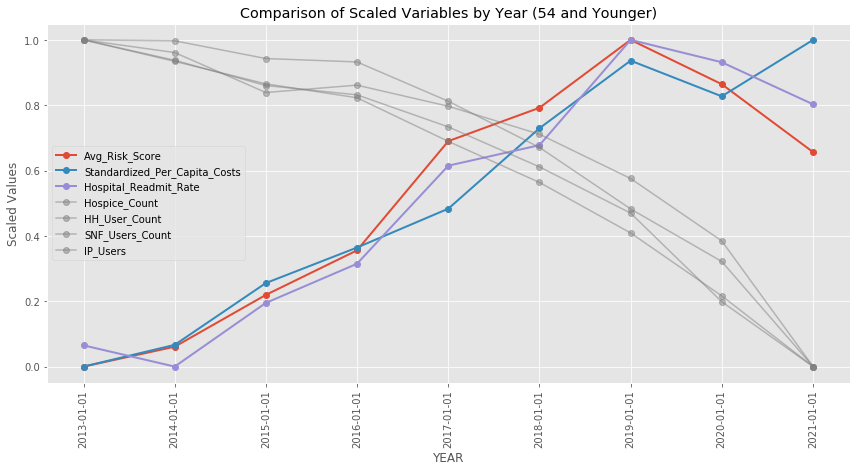

In [214]:
#viewing 3 variables
import matplotlib.pyplot as plt

# Define the columns to scale and plot
columns_to_scale = ['Avg_Risk_Score', 'Standardized_Per_Capita_Costs',
                    'Hospital_Readmit_Rate', 'Hospice_Count', 'HH_User_Count',
                    'SNF_Users_Count', 'IP_Users']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the selected columns
scaled_data = scaler.fit_transform(year_younger_df[columns_to_scale])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
scaled_df['YEAR'] = year_younger_df['YEAR']

# Plot the scaled variables using a line graph
plt.figure(figsize=(12, 6))

# Iterate over the columns (excluding 'YEAR') and plot each one
for column in scaled_df.columns[:-1]:
    if column in ['Hospital_Readmit_Rate', 'Avg_Risk_Score', 'Standardized_Per_Capita_Costs']:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', linewidth=2)
    else:
        plt.plot(scaled_df['YEAR'], scaled_df[column], marker='o', label=column, linestyle='-', color='grey', alpha=0.5)

plt.xlabel('YEAR')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Variables by Year (54 and Younger)')
plt.legend()
plt.tight_layout()

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=90)

# Set the x-axis ticks to display all individual years
plt.xticks(scaled_df['YEAR'])

plt.show()


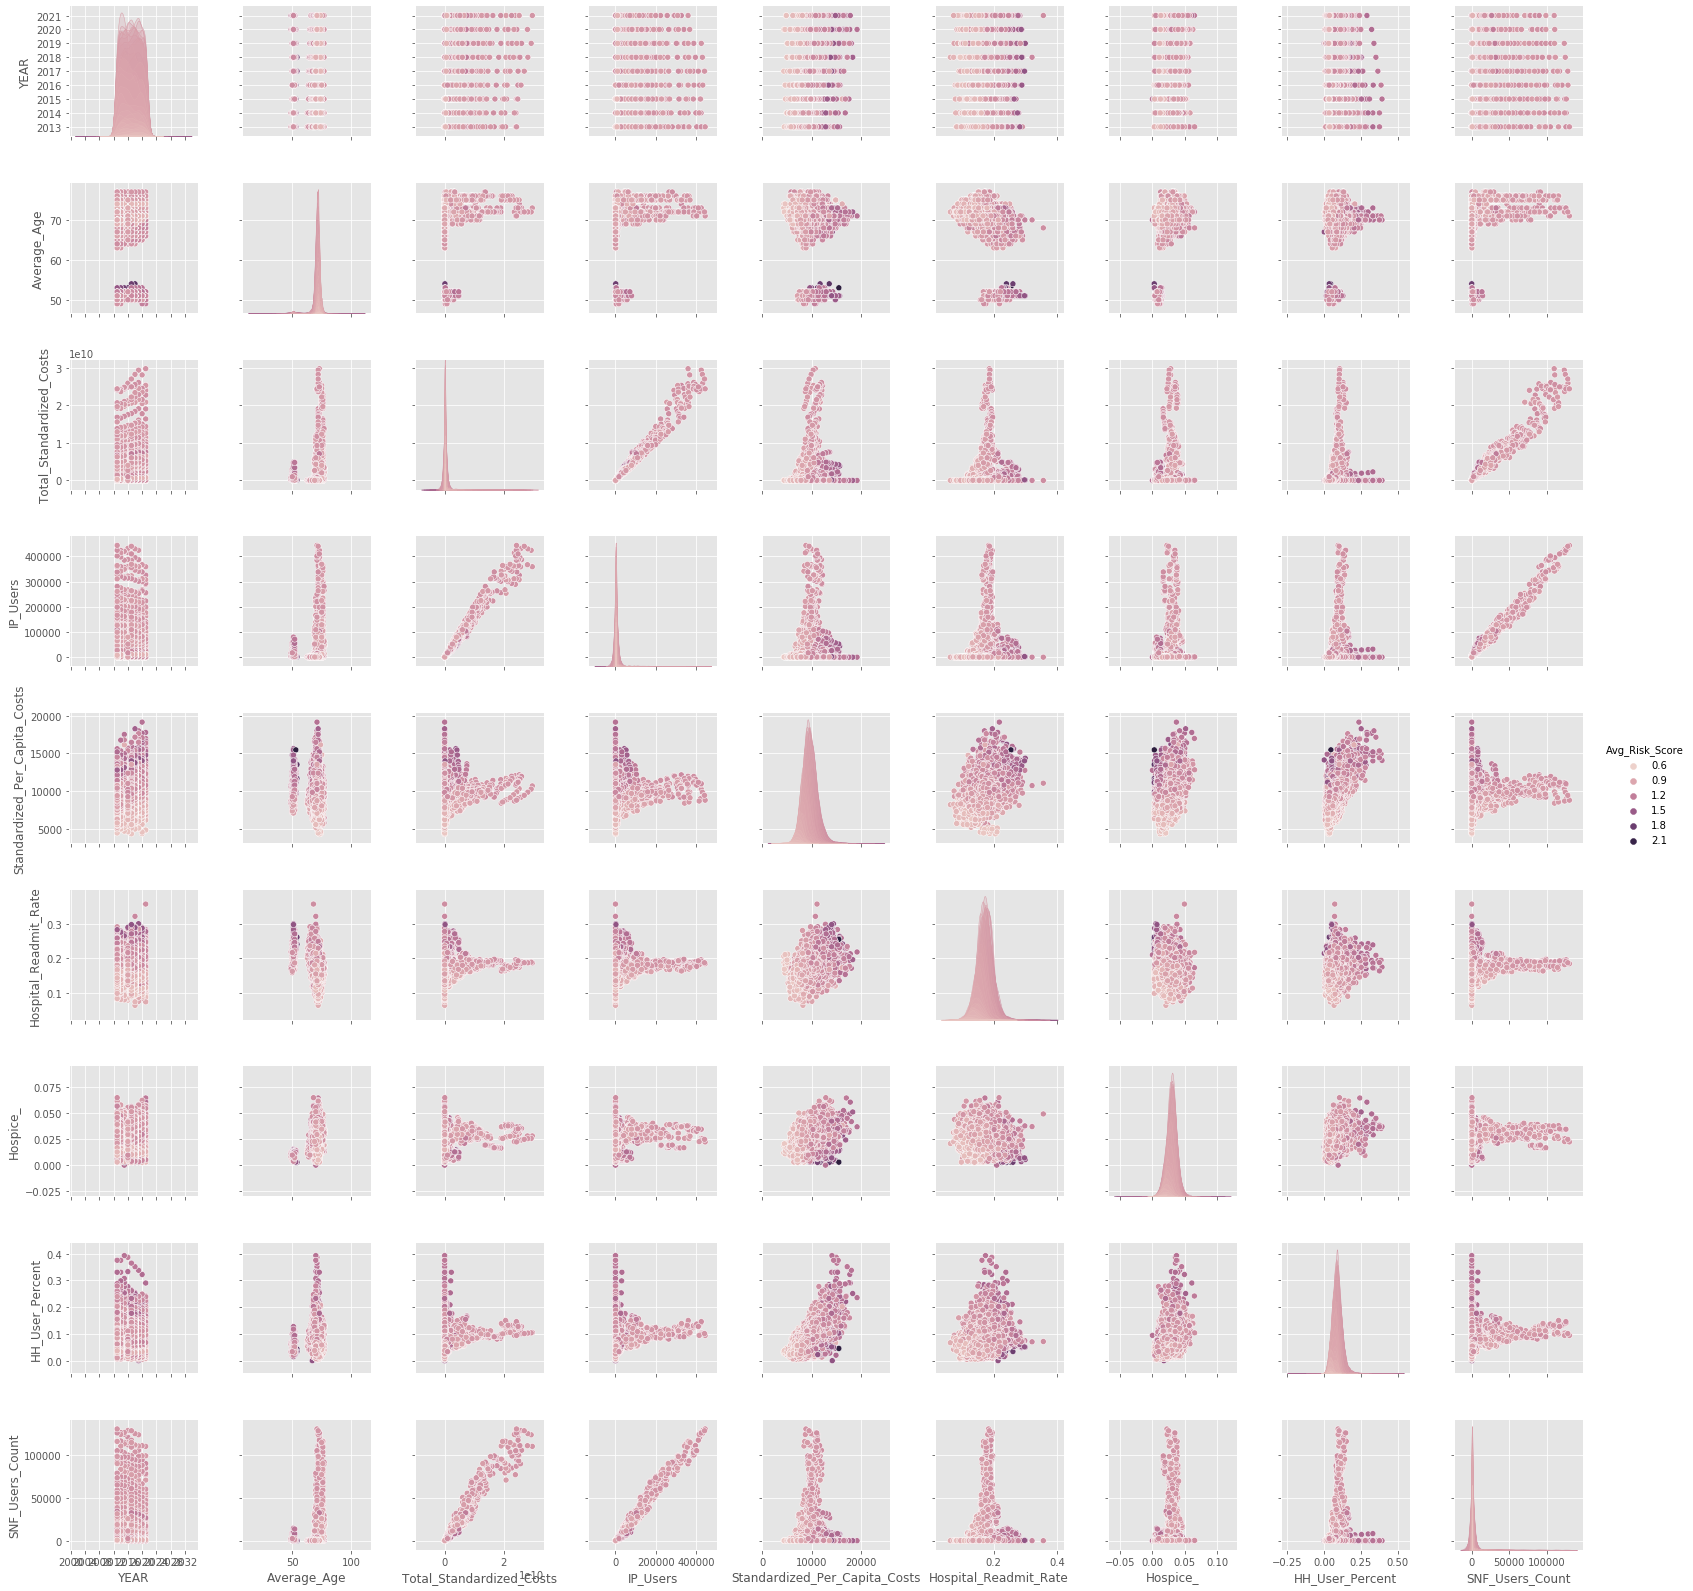

In [81]:
#comparison charts

sns.pairplot(df, 
             vars=['YEAR', 'Average_Age',
                   'Total_Standardized_Costs', 'IP_Users', 'Standardized_Per_Capita_Costs', 
                   'Hospital_Readmit_Rate','Hospice_', 'HH_User_Percent', 'SNF_Users_Count'],
            hue = 'Avg_Risk_Score',
            )

In [96]:
df_corr2 = df[['YEAR', 'Average_Age',
                   'Avg_Risk_Score', 'Standardized_Per_Capita_Costs', 'Hospital_Readmit_Rate',
                    'Hospice_', 'Hospice_Count', 'HH_User_Percent', 'HH_User_Count', 'SNF_Users_Count']].corr()
df_corr2

,Average_Age,Avg_Risk_Score,Standardized_Per_Capita_Costs,Hospital_Readmit_Rate,Hospice_,Hospice_Count,HH_User_Percent,HH_User_Count,SNF_Users_Count
Average_Age,1.000000,-0.372852,-0.101607,-0.395465,0.342415,0.114750,0.036311,0.077845,0.098226
Avg_Risk_Score,-0.372852,1.000000,0.707696,0.601768,0.150245,0.036753,0.467555,0.069289,0.054877
Standardized_Per_Capita_Costs,-0.101607,0.707696,1.000000,0.453759,0.388443,0.035000,0.631225,0.054063,0.032304
Hospital_Readmit_Rate,-0.395465,0.601768,0.453759,1.000000,-0.087317,0.031389,0.270486,0.060358,0.051871
Hospice_,0.342415,0.150245,0.388443,-0.087317,1.000000,0.059851,0.354773,0.029107,0.021082
Hospice_Count,0.114750,0.036753,0.035000,0.031389,0.059851,1.000000,0.073799,0.976867,0.963925
HH_User_Percent,0.036311,0.467555,0.631225,0.270486,0.354773,0.073799,1.000000,0.099229,0.071866
HH_User_Count,0.077845,0.069289,0.054063,0.060358,0.029107,0.976867,0.099229,1.000000,0.972584
SNF_Users_Count,0.098226,0.054877,0.032304,0.051871,0.021082,0.963925,0.071866,0.972584,1.000000


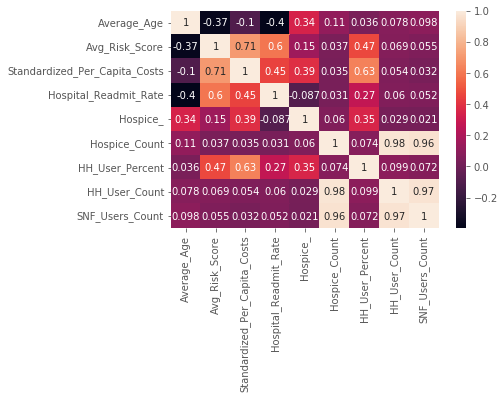

In [97]:
sns.heatmap(df_corr2, annot=True)
